In [ ]:
'tangent_ogive','ellipse','parabole','power_series','haack_series','cone'

In [12]:
rodict={'tube_length': 2.0,
        'tube_radius': 0.1,
        'tube_thickness': 0.01,
        'tube_density': 2700.0,
        'nose_type': 'power_series',
        'nose_parameter': 0.1,
        'nose_length': 0.5,
        'nose_radius': 0.1,
        'nose_thickness': 0.01,
        'nose_density': 7850.0,
        'fins_Cr': 0.2,
        'fins_Ct': 0.1,
        'fins_Xt': 0.1,
        'fins_s': 0.15,
        'fins_thickness': 0.01,
        'fins_number': 4,
        'fins_density': 1780.0,
        'fins_position': 0.0,
        'motor': {'availability': 'OOP',
                'avgThrustN': 2.48,
                'burnTimeS': 0.23,
                'certOrg': 'National Association of Rocketry',
                'commonName': '1/4A2',
                'dataFiles': 2,
                'delays': '2,4',
                'designation': '1/4A2',
                'diameter': 10.5,
                'impulseClass': 'A',
                'infoUrl': 'http://nar.org/SandT/pdf/Apogee/qtrA2.pdf',
                'length': 38,
                'manufacturer': 'Apogee Components',
                'manufacturerAbbrev': 'Apogee',
                'maxThrustN': 5.4,
                'motorId': '5f4294d20002310000000003',
                'propWeightG': 0.75,
                'samples': [[0, 0], [0.007, 0.162], [0.023, 0.65], [0.041, 1.463], [0.058, 2.519], [0.074, 3.738], [0.079, 3.9], [0.088, 4.915], [0.097, 5.119], [0.106, 5.4], [0.11, 5.119], [0.118, 3.981], [0.125, 3.656], [0.132, 3.453], [0.136, 3.209], [0.151, 3.169], [0.156, 2.966], [0.168, 2.884], [0.18, 2.397], [0.194, 1.625], [0.207, 1.056], [0.218, 0.406], [0.23, 0]],
                'totImpulseNs': 0.57,
                'type': 'SU',
                'updatedOn': '2019-04-17'},
        'motor_position': 0.0}

rocket = MyRocket.fromDict(rodict)

rocket.get_cog()

[ 2.23634919e+00 -3.71810734e-10  6.67538803e-12]
-20.8022357068027
[1. 0. 0.]
32.147973898099735
[0.07777778 0.         0.        ]
1.6020000415543714
[0.019 0.    0.   ]
0.0007480275844118454


array([-1.10039696e+00,  5.97328087e-10, -1.07242648e-11])

In [20]:
d = {'m1':1, 'm2':2,'m3':3}
print(list(d.items()))

[('m1', 1), ('m2', 2), ('m3', 3)]


In [3]:
import pyvista as pv
import include.init_rocket.mesh_creation as mc
import include.init_rocket.nose_creation as nc
import numpy as np
from scipy.spatial.transform import Rotation as R

import test as test


In [5]:
cylinder = test.nose(shape_function = 'ellipse', OVpnum=4,Cpnum=4)

my_mesh = cylinder.stl_mesh
my_mesh.save('cylinder.stl')


In [6]:
print(my_mesh.normals.sum(axis=0))

my_mesh.get_mass_properties()

Your mesh is not closed, the mass methods will not function
            correctly on this mesh.  For more info:
            https://github.com/WoLpH/numpy-stl/issues/69


[ 5.5999994e-01 -1.4901161e-08  0.0000000e+00]


(0.07243106576303641,
 array([0.21638332, 0.        , 0.        ]),
 array([[ 6.61018409e-03, -0.00000000e+00, -0.00000000e+00],
        [-0.00000000e+00,  4.32105779e-03,  1.16415322e-11],
        [-0.00000000e+00,  1.16415322e-11,  4.32105779e-03]]))

In [7]:
faces = cylinder.brute_mesh.faces

faces = np.pad(faces,pad_width=((0,0),(1,0)), mode='constant', constant_values=3)

mesh = pv.PolyData(cylinder.brute_mesh.vertices,faces)
mesh.plot(jupyter_backend='pythreejs')

AttributeError: type object 'DataImage' has no attribute '_instance_inits'

In [8]:
length = .5
OVpnum = 20
Cpnum=20
radius=.5
curve_param = 0
thick = .1
pos=0

def translate(vertices, trans_vect  = np.zeros(3)):
    return vertices + trans_vect

x = np.linspace(0, length, OVpnum, endpoint=True)
nose_points = eval("nc.ellipse(x, radius, length, C=curve_param, thick=thick)")

out_vertices = nose_points.out_points
in_vertices = nose_points.in_points

rotation_xz = R.from_euler('xyz',angles=[np.pi,0,np.pi], degrees=False)
transvect = np.array([pos+length, 0, 0])
out_vertices = translate(rotation_xz.apply(out_vertices), trans_vect  = transvect)
in_vertices = translate(rotation_xz.apply(in_vertices), trans_vect  = transvect)

nose_points = nc.Nose(out_vertices,in_vertices)

plot_brute_mesh, my_mesh = mc.half_nose(nose_points, Cpnum = Cpnum//2)

my_mesh.save('cylinder.stl')

/opt/anaconda3/lib/python3.8/site-packages/pyvista/jupyter/notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


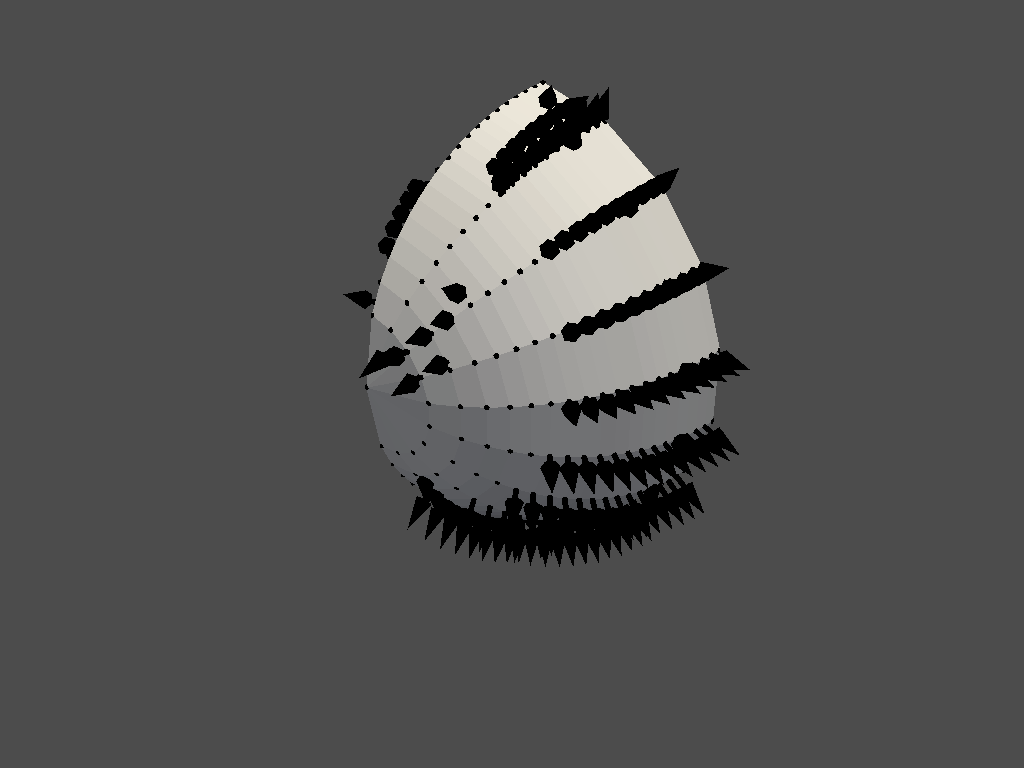

/opt/anaconda3/lib/python3.8/site-packages/pyvista/jupyter/notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


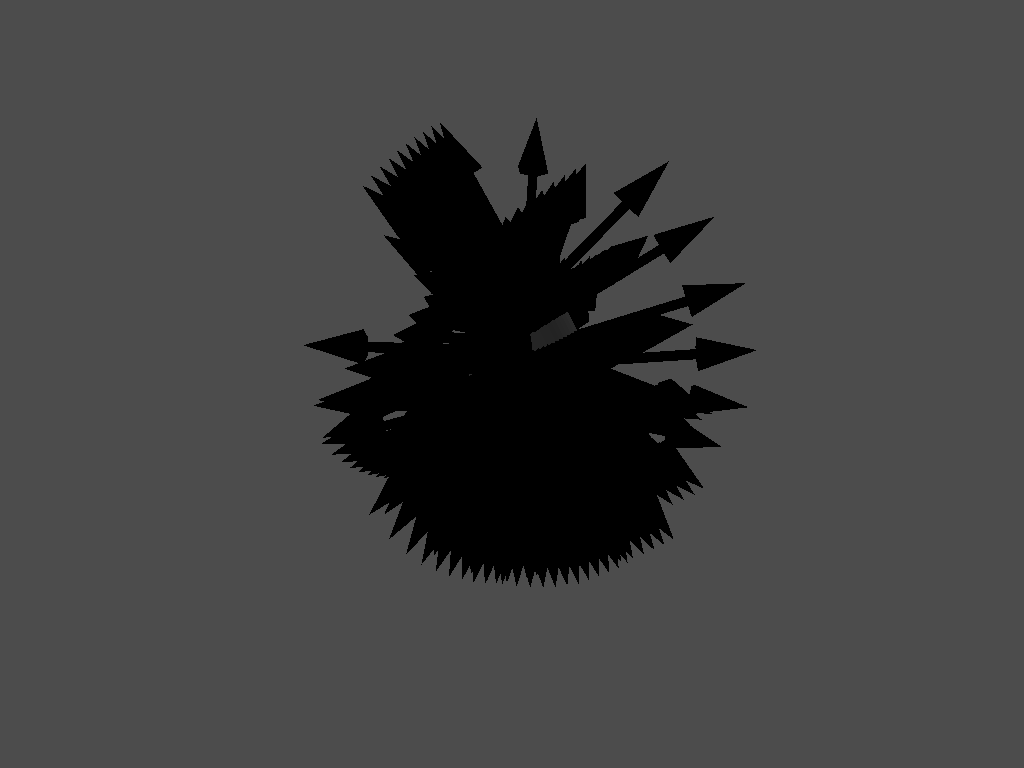

AttributeError: type object 'DataImage' has no attribute '_instance_inits'

: 

In [4]:
mesh = pv.read('cylinder.stl')

# Compute normals
mesh.compute_normals(cell_normals=True, point_normals=False, inplace=True)

mesh.plot_normals(mag=0.2)

mesh.flip_normals()
mesh.plot_normals(mag=1)


# Get list of cell IDs that meet condition
ids = np.arange(mesh.n_cells)[mesh['Normals'][:, 0] < 0.0]

# Extract those cells
top = mesh.extract_cells(ids)

top.plot(jupyter_backend='pythreejs')

In [2]:
mesh = pv.read('cylinder.stl')
mesh.plot(jupyter_backend='pythreejs')
mesh

NameError: name 'pv' is not defined

In [1]:
from stl import mesh as msh


your_mesh = msh.Mesh.from_file('cylinder.stl')

(your_mesh.points)

array([[ 5.0000000e-01,  0.0000000e+00,  0.0000000e+00,  3.3333334e-01,
         3.7267798e-01,  4.5638383e-17,  3.3333334e-01,  3.7112755e-17,
         3.7267798e-01],
       [ 3.3333334e-01,  3.7267798e-01,  4.5638383e-17,  1.6666667e-01,
         4.6944333e-17,  4.7140452e-01,  3.3333334e-01,  3.7112755e-17,
         3.7267798e-01],
       [ 3.3333334e-01,  3.7267798e-01,  4.5638383e-17,  1.6666667e-01,
         4.7140452e-01,  5.7728498e-17,  1.6666667e-01,  4.6944333e-17,
         4.7140452e-01],
       [ 1.6666667e-01,  4.7140452e-01,  5.7728498e-17,  5.5511151e-17,
         4.9791985e-17,  5.0000000e-01,  1.6666667e-01,  4.6944333e-17,
         4.7140452e-01],
       [ 1.6666667e-01,  4.7140452e-01,  5.7728498e-17,  5.5511151e-17,
         5.0000000e-01,  6.1230318e-17,  5.5511151e-17,  4.9791985e-17,
         5.0000000e-01],
       [ 5.0000000e-01,  0.0000000e+00,  0.0000000e+00,  3.3333334e-01,
         3.7112755e-17,  3.7267798e-01,  3.3333334e-01, -3.7267798e-01,
         0.